
### PHÂN TÍCH DỮ LIỆU KHẢO SÁT SỰ HÀI LÒNG CỦA HÀNH KHÁCH VỚI DỊCH VỤ BAY
---
**MỤC TIÊU:**
Nhằm cải thiện, nâng cao chất lượng phục vụ hành khách. Giúp tìm ra những dịch vụ, những khâu còn hạn chế để đem đến sự hài lòng cho hành khách qua đó thu hút và giữ chân khách hàng sử dụng dịch vụ bay của hãng mình. Hãng hàng không United Airline cần thực hiện khảo sát với các hành khách đã sử dụng dịch vụ bay của mình.

<img src='Pic/flight_survey.jpeg' width='300px'>

**DỮ LIỆU:**
Tập dữ liệu bao gồm 129875 ý kiến đánh giá của 129875 hành khách tham gia sử dụng dịch vụ bay. Bao gồm 19 thông tin sau: (Tập dữ liệu đã được làm sạch)

**A. Các thông tin chung của hành khách và chuyến bay:**
1. Gender: Giới tính của hành khách (Male|Female)
2. Customer Type: Loại hành khách. 
    * Khách hàng thân thiết (Loyal Customer): Khách hàng đã đi nhiều lần (>=2) với hãng
    * Khách hàng không thân thiết (disloyal Customer): Khách hàng không thân thiết (sử dụng dịch vụ bay lần đầu của hãng)
3. Age: Tuổi của khách hàng
4. Type of Travel: Mục đích đi máy bay
    * Đi với mục đích công việc (Business travel)
    * Đi với mục đích cá nhân (Personal Travel)
5. Class: Loại vé (Business | Eco Plus | Eco)
6. Flight Distance: Khoảng cách di chuyển của chuyến bay (Mile)
7. Departure Delay in Minutes: Thời gian trễ của chuyến bay tại ga xuất phát (Phút)
8. Arrival Delay in Minutes: Thời gian trễ của chuyến bay tại ga đến (phút)

**B. Các thông tin khảo sát:** Thang chấm từ 0 (thấp nhất)  --> 5 (cao nhất)

9. Inflight wifi service: Dịch vụ wifi trên chuyến bay
10. Departure/Arrival time convenient: Mức độ thuận tiện trong thời gian ở Ga khởi hành| Ga đến
11. Ease of Online booking: Mức độ dễ đàng khi đặt vé Online
12. Food and drink: Đồ ăn và đồ uống phục vụ trên chuyến bay
13. Seat comfort: Sự thoải mái của chỗ ngồi
14. Inflight entertainment: Dịch vụ giải trí trên chuyến bay
15. Baggage handling: Vấn đề liên quan đến hành lý xách tay
16. Checkin service: Dịch vụ checkin
17. Inflight service: Dịch vụ trên chuyến bay
18. Cleanliness: Vệ sinh trên chuyến bay

**C.Đánh giá chung của hành khách:**

19. satisfaction: Tổng quan chung về mức độ hài lòng.
    * KHÔNG HÀI LÒNG với chuyến bay (neutral or dissatisfied)
    * HÀI LÒNG với chuyến bay (satisfied)

**MỤC TIÊU:**
- Phân tích các kết quả khảo sát, xác định những dịch vụ ảnh hưởng tới mức độ không hài lòng của hành khách


# 1. Đọc và quan sát dữ liệu
---
* NOTE - Tập dữ liệu đã được làm sạch!

In [1]:
#Gọi các thư viện sử dụng:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#-------------------------------------
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Đọc dữ liệu từ file CSV:
df_passenger = pd.read_csv('Data/Data_Airlines_OK.csv')
df_passenger.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129875 entries, 0 to 129874
Data columns (total 20 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Code                               129875 non-null  object 
 1   Gender                             129875 non-null  object 
 2   Customer Type                      129875 non-null  object 
 3   Age                                129875 non-null  int64  
 4   Type of Travel                     129875 non-null  object 
 5   Class                              129875 non-null  object 
 6   Flight Distance                    129875 non-null  int64  
 7   Departure Delay in Minutes         129875 non-null  float64
 8   Arrival Delay in Minutes           129485 non-null  float64
 9   Inflight wifi service              129875 non-null  int64  
 10  Departure/Arrival time convenient  129875 non-null  int64  
 11  Ease of Online booking             1298

In [3]:
#Hiển thị 5 bản ghi đầu tiên của dữ liệu:
df_passenger.head()

,Code,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Food and drink,Seat comfort,Inflight entertainment,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
0,WX02553023,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,25.0,18.0,0,4,3,0,5,5,0,0,5,0,neutral or dissatisfied
1,QS99844747,Male,Disloyal Customer,25,Business travel,Business,235,1.0,6.0,0,2,3,1,1,1,1,1,0,1,neutral or dissatisfied
2,OL00432935,Female,Loyal Customer,26,Business travel,Business,1142,0.0,0.0,2,2,2,5,5,5,4,4,4,5,satisfied
3,CM55347278,Female,Loyal Customer,25,Business travel,Business,562,11.0,9.0,0,5,5,2,2,2,1,1,0,2,neutral or dissatisfied
4,TZ46480191,Male,Loyal Customer,61,Business travel,Business,214,0.0,0.0,3,3,3,4,5,3,4,3,3,3,satisfied


In [4]:
#Hiển thị 5 bản ghi cuối cùng của dữ liệu:
df_passenger.tail()

,Code,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Food and drink,Seat comfort,Inflight entertainment,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
129870,FT08787333,Male,Disloyal Customer,34,Business travel,Business,526,0.0,0.0,3,3,3,4,4,4,4,4,5,4,neutral or dissatisfied
129871,PO34507015,Male,Loyal Customer,23,Business travel,Business,646,0.0,0.0,4,4,4,4,4,4,5,5,5,4,satisfied
129872,ZI79990801,Female,Loyal Customer,17,Personal Travel,Eco,828,0.0,0.0,2,5,1,2,2,2,4,5,4,2,neutral or dissatisfied
129873,TN82785469,Male,Loyal Customer,14,Business travel,Business,1127,0.0,0.0,3,3,3,4,4,4,5,4,5,4,satisfied
129874,QY90921876,Female,Loyal Customer,42,Personal Travel,Eco,264,0.0,0.0,2,5,2,4,2,1,1,1,1,1,neutral or dissatisfied


In [5]:
#Quan sát các đặc trưng thống kê số:
df_passenger.describe()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Food and drink,Seat comfort,Inflight entertainment,Baggage handling,Checkin service,Inflight service,Cleanliness
count,129875.000000,129875.000000,129875.000000,129485.000000,129875.000000,129875.000000,129875.000000,129875.000000,129875.000000,129875.000000,129875.000000,129875.000000,129875.000000,129875.000000
mean,39.427881,1190.324012,14.713917,15.091292,2.386918,3.057594,2.756859,2.571750,3.281016,3.358067,2.681109,2.642271,3.526160,3.221505
std,15.119628,997.440386,38.071778,38.465921,1.551930,1.526738,1.401729,1.567982,1.528839,1.334047,1.628522,1.627418,1.323709,1.458888
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,0.000000,0.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000,3.000000,2.000000
50%,40.000000,844.000000,0.000000,0.000000,2.000000,3.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000
75%,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000
max,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [6]:
#Quan sát các đặc trưng thống kê object:
df_passenger.describe(include='O')

,Code,Gender,Customer Type,Type of Travel,Class,satisfaction
count,129875,129875,129875,129875,129875,129875
unique,129875,2,2,2,3,2
top,WX02553023,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,1,65896,106096,89688,62156,73450


# 2. Thống kê thông số của hành khách thực hiện Khảo sát
---
Thống kê thông số đặc trưng của Hành Khách, hiểu về Tập dữ liệu hành khách đã thực hiện khảo sát.

**Tổng quan về hành khách tham gia khảo sát:**
---

In [7]:
print('\n 1. Thống kê theo giới tính:')
gender = df_passenger['Gender'].value_counts()
print(gender)

print('\n 2.Thống kê theo phân loại khách:')
customertype = df_passenger['Customer Type'].value_counts()
print(customertype)


print('\n 3.Thống kê theo mục đích chuyến đi:')
typeoftravel = df_passenger['Type of Travel'].value_counts()
print(typeoftravel)

print('\n 4.Thống kê theo hạng vé:')
classticket = df_passenger['Class'].value_counts()
print(classticket)


 1. Thống kê theo giới tính:
Gender
Female    65896
Male      63979
Name: count, dtype: int64

 2.Thống kê theo phân loại khách:
Customer Type
Loyal Customer       106096
Disloyal Customer     23779
Name: count, dtype: int64

 3.Thống kê theo mục đích chuyến đi:
Type of Travel
Business travel    89688
Personal Travel    40187
Name: count, dtype: int64

 4.Thống kê theo hạng vé:
Class
Business    62156
Eco         58308
Eco Plus     9411
Name: count, dtype: int64


In [8]:
#xây dựng một số hàm vẽ biểu đồ:
#Hàm hiển thị text trên biểu đồ cột:
def label_bar(bar_plot,bar_label):
    for idx,rect in enumerate(bar_plot):
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 1.005*height,
                bar_label[idx],
                ha='center', va='bottom', rotation=0)

#Hàm vẽ biểu đồ hình cột:
def plot_bar(r,h,p,x,y,c):
    plt.subplot(r,h,p)
    ax1 = plt.bar(x,y,color=c)
    label_bar(ax1,y)
    plt.grid(ls='--')


#Hàm vẽ biểu đồ hình tròn:
def plot_pie(r,h,p,label,value,c):
    plt.subplot(r,h,p)
    plt.pie(value,
            labels=label,
            colors=c,
            startangle=90,
            labeldistance=1.1,
            pctdistance=0.6, 
            wedgeprops=dict(width=0.7,edgecolor='w'),
            autopct='%.2f %%')

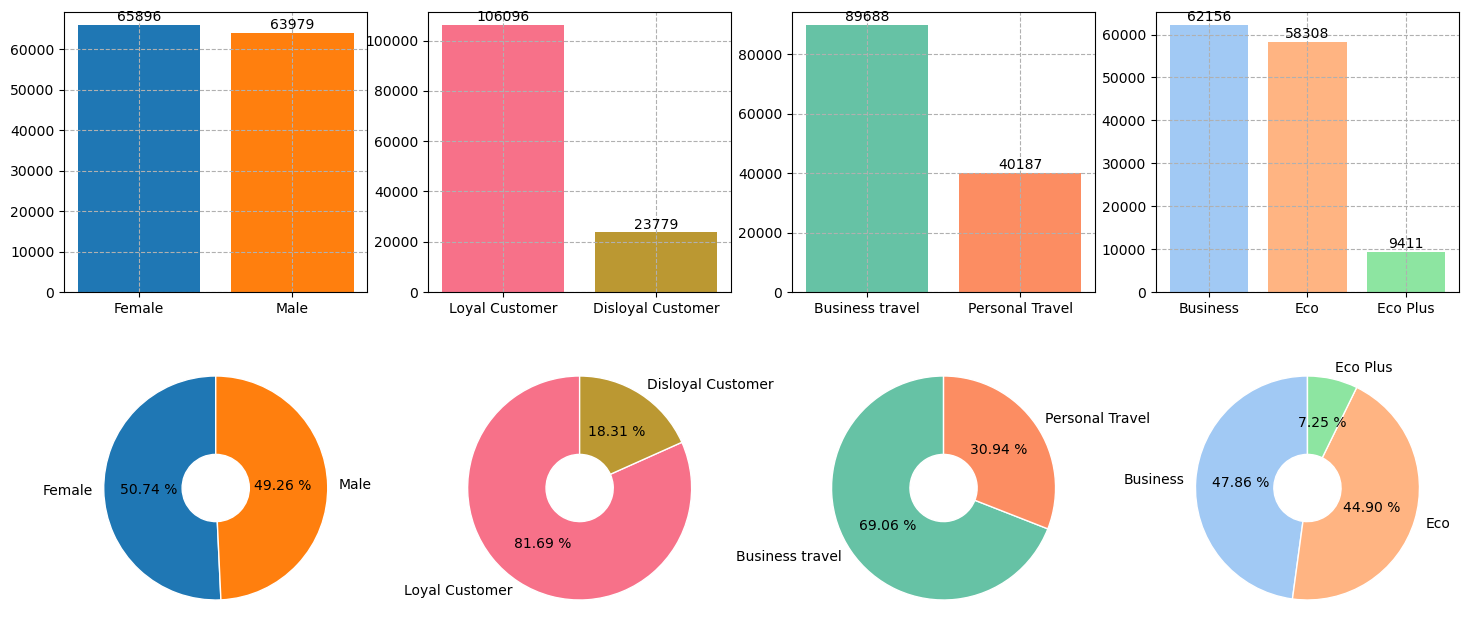

In [9]:
#Trực quan hóa dữ liệu:
plt.figure(figsize=(18,8))

#Lấy bảng màu
color1=sns.color_palette()
color2=sns.color_palette("husl")
color3=sns.color_palette("Set2")
color4=sns.color_palette("pastel")

#Trực quan hóa số liệu giới tính:
plot_bar(2,4,1,gender.index,gender.values,color1)
plot_pie(2,4,5,gender.index,gender.values,color1)

#Trực quan hóa số liệu phân loại khách:
plot_bar(2,4,2,customertype.index,customertype.values,color2)
plot_pie(2,4,6,customertype.index,customertype.values,color2)

#Trực quan hóa số liệu mục đích chuyến bay:
plot_bar(2,4,3,typeoftravel.index,typeoftravel.values,color3)
plot_pie(2,4,7,typeoftravel.index,typeoftravel.values,color3)

#Trực quan hóa số liệu hạng vé hành khách:
plot_bar(2,4,4,classticket.index,classticket.values,color4)
plot_pie(2,4,8,classticket.index,classticket.values,color4)

plt.show()

**NHẬN XÉT:**

0. Tổng số hành khách thực hiện lấy khảo sát: 129875 
1. Tỷ lệ khách lấy khảo sát theo giới tính là tương đối cân bằng: ~50% Male ~ 50% Female
2. ~80% hành khách thực hiện khảo sát là hành khách đã sử dụng dịch vụ bay của hãng từ >=2 lần.
3. ~70% hành khách khảo sát sử dụng dịch vụ bay cho mục đích công việc, 30% cho mục đích cá nhân.
4. Hành khách lấy khảo sát chủ yếu mua vé hạng thương gia (Business - 48%) và phổ thông (Eco - 45%), vé hạng Eco plus chiếm tỷ lệ nhỏ (~7%) 

In [10]:
#Thống kê số liệu hành khách theo độ tuổi:
df_passenger['Age'].describe()

count    129875.000000
mean         39.427881
std          15.119628
min           7.000000
25%          27.000000
50%          40.000000
75%          51.000000
max          85.000000
Name: Age, dtype: float64

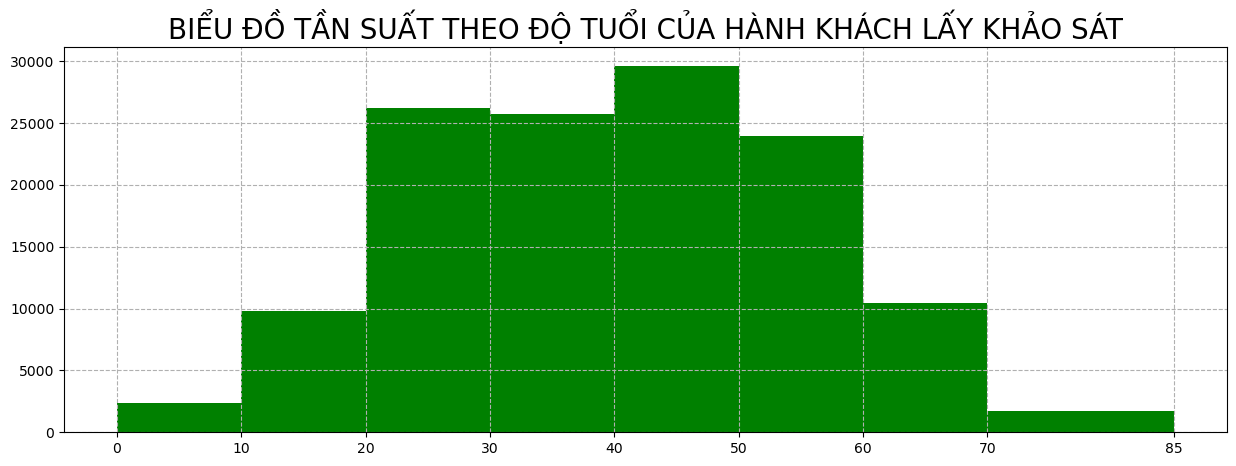

In [11]:
#Sử dụng biểu đồ Histogram để trực quan hóa dữ liệu độ tuổi
plt.figure(figsize=(15,5))
plt.hist(df_passenger['Age'],bins=[0,10,20,30,40,50,60,70,85],color='g')
plt.xticks([0,10,20,30,40,50,60,70,85])
plt.grid(ls='--')
plt.title('BIỂU ĐỒ TẦN SUẤT THEO ĐỘ TUỔI CỦA HÀNH KHÁCH LẤY KHẢO SÁT',fontsize=20)
plt.show()

**NHẬN XÉT:**
- Độ tuổi trung bình của hành khách lấy khảo sát là ~40 tuổi.
- Hành khách nhỏ tuổi nhất lấy khảo sát: 7 tuổi
- Hành khách cao tuổi nhất lấy khảo sát: 85 tuổi
- Độ tuổi Hành khách lấy khảo sát chủ yếu tập trung trong khoảng từ 18 - 60

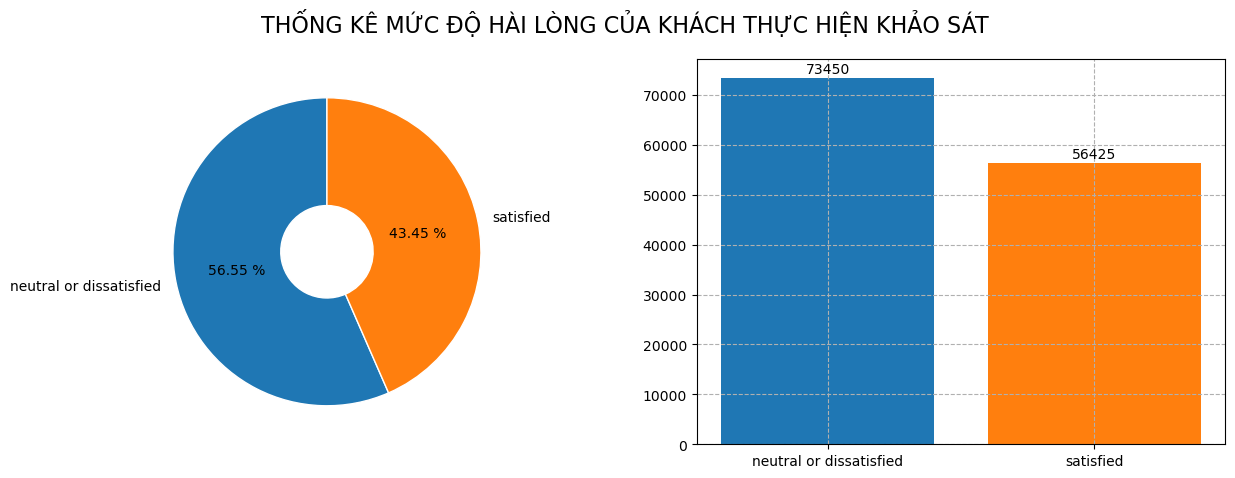

In [12]:
#Thống kê kết quả tổng quan đánh giá mức độ hài lòng của hành khách:
satisfaction = df_passenger['satisfaction'].value_counts()

#Trực quan hóa dữ liệu 
plt.figure(figsize=(15,5))
color = sns.color_palette()

plt.subplot(1,2,1)
plt.pie(satisfaction.values,
        labels=satisfaction.index,
        colors=color,
        startangle=90,
        wedgeprops=dict(width=0.7,edgecolor='w'),
        autopct='%.2f %%')

plt.subplot(1,2,2)
bar = plt.bar(satisfaction.index,satisfaction.values,color=color)
label_bar(bar,satisfaction.values)
plt.grid(ls='--')

plt.suptitle('THỐNG KÊ MỨC ĐỘ HÀI LÒNG CỦA KHÁCH THỰC HIỆN KHẢO SÁT',fontsize=16)
plt.show()

**NHẬN XÉT:**
- Tỷ lệ hành khách khảo sát có đánh giá tổng quan là bình thường hoặc không hài lòng (KHÔNG HÀI LÒNG) với các dịch vụ là 73450 chiếm khoảng ~57%; lượng khách đánh giá HÀI LÒNG là 56425 chiếm ~43%.

# 4. Thực hiện phân tích dữ liệu
---
## 4.1 Lọc dữ liệu và thống kê

## Tập trung vào nhóm khách hàng không hài lòng với dịch vụ của Hãng 
---

Trong bảng khảo sát bao gồm 10 dịch vụ sau: 
1. Inflight wifi service: Dịch vụ wifi trên chuyến bay
2. Departure/Arrival time convenient: Mức độ thuận tiện trong thời gian ở Ga khởi hành| Ga đến
3. Ease of Online booking: Mức độ dễ đàng khi đặt vé Online
4. Food and drink: Đồ ăn và đồ uống phục vụ trên chuyến bay
5. Seat comfort: Sự thoải mái của chỗ ngồi
6. Inflight entertainment: Dịch vụ giải trí trên chuyến bay
7. Baggage handling: Vấn đề liên quan đến hành lý
8. Checkin service: Dịch vụ checkin
9. Inflight service: Dịch vụ khác trên chuyến bay
10. Cleanliness: Vệ sinh trên chuyến bay

Chúng ta sẽ thực hiện thống số liệu với các dịch vụ này, chỉ tập trung vào nhóm KHÔNG HÀI LÒNG --> Xác định kết quả và đánh giá các dịch vụ quan trọng ảnh hưởng đến sự hài lòng của hành khách.

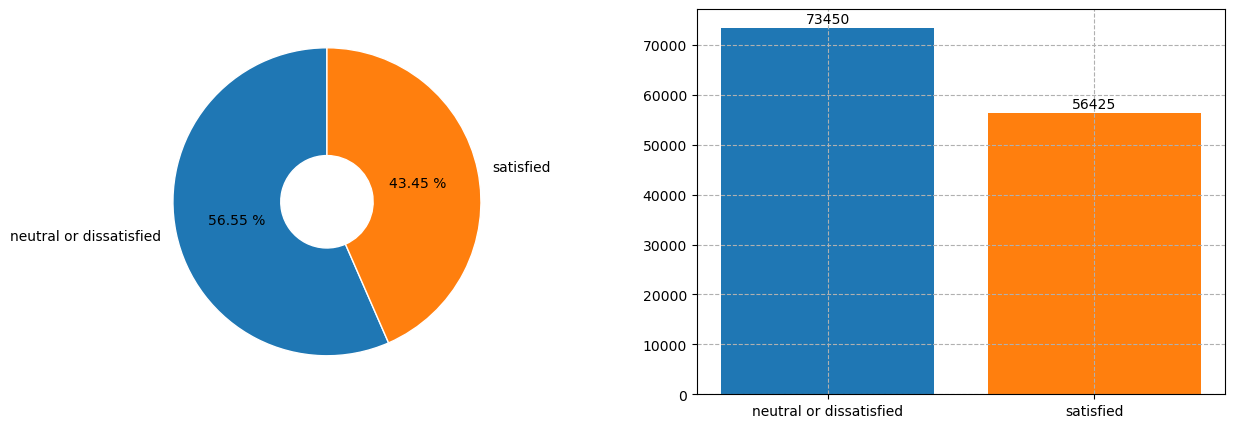

In [13]:
#KẾT QUẢ ĐÁNH GIÁ CỦA HÀNH KHÁCH: 
plt.figure(figsize=(15,5))
plot_pie(1,2,1,satisfaction.index,satisfaction.values,color1)
plot_bar(1,2,2,satisfaction.index,satisfaction.values,color1)
plt.show()

In [14]:
#Lọc lấy các hành khách có đánh giá chung là KHÔNG HÀI LÒNG:
df_passenger_no = df_passenger[df_passenger['satisfaction']=='neutral or dissatisfied']
df_passenger_no.reset_index(drop=True, inplace=True)
df_passenger_no.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73450 entries, 0 to 73449
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Code                               73450 non-null  object 
 1   Gender                             73450 non-null  object 
 2   Customer Type                      73450 non-null  object 
 3   Age                                73450 non-null  int64  
 4   Type of Travel                     73450 non-null  object 
 5   Class                              73450 non-null  object 
 6   Flight Distance                    73450 non-null  int64  
 7   Departure Delay in Minutes         73450 non-null  float64
 8   Arrival Delay in Minutes           73224 non-null  float64
 9   Inflight wifi service              73450 non-null  int64  
 10  Departure/Arrival time convenient  73450 non-null  int64  
 11  Ease of Online booking             73450 non-null  int

In [15]:
#Danh sách khách hàng đánh giá bình thường hoặc ko hài lòng:
df_passenger_no

,Code,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Food and drink,Seat comfort,Inflight entertainment,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
0,WX02553023,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,25.0,18.0,0,4,3,0,5,5,0,0,5,0,neutral or dissatisfied
1,QS99844747,Male,Disloyal Customer,25,Business travel,Business,235,1.0,6.0,0,2,3,1,1,1,1,1,0,1,neutral or dissatisfied
2,CM55347278,Female,Loyal Customer,25,Business travel,Business,562,11.0,9.0,0,5,5,2,2,2,1,1,0,2,neutral or dissatisfied
3,WG85023638,Female,Loyal Customer,26,Personal Travel,Eco,1180,0.0,0.0,0,4,2,1,1,1,0,0,0,1,neutral or dissatisfied
4,CS15349553,Male,Loyal Customer,47,Personal Travel,Eco,1276,9.0,23.0,0,4,2,2,2,2,0,0,5,2,neutral or dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73445,XP24948360,Male,Loyal Customer,41,Business travel,Eco,692,15.0,3.0,2,2,2,2,2,2,3,2,3,2,neutral or dissatisfied
73446,YW74457688,Female,Disloyal Customer,36,Business travel,Eco,432,0.0,0.0,1,5,1,4,4,4,5,2,3,4,neutral or dissatisfied
73447,FT08787333,Male,Disloyal Customer,34,Business travel,Business,526,0.0,0.0,3,3,3,4,4,4,4,4,5,4,neutral or dissatisfied
73448,ZI79990801,Female,Loyal Customer,17,Personal Travel,Eco,828,0.0,0.0,2,5,1,2,2,2,4,5,4,2,neutral or dissatisfied


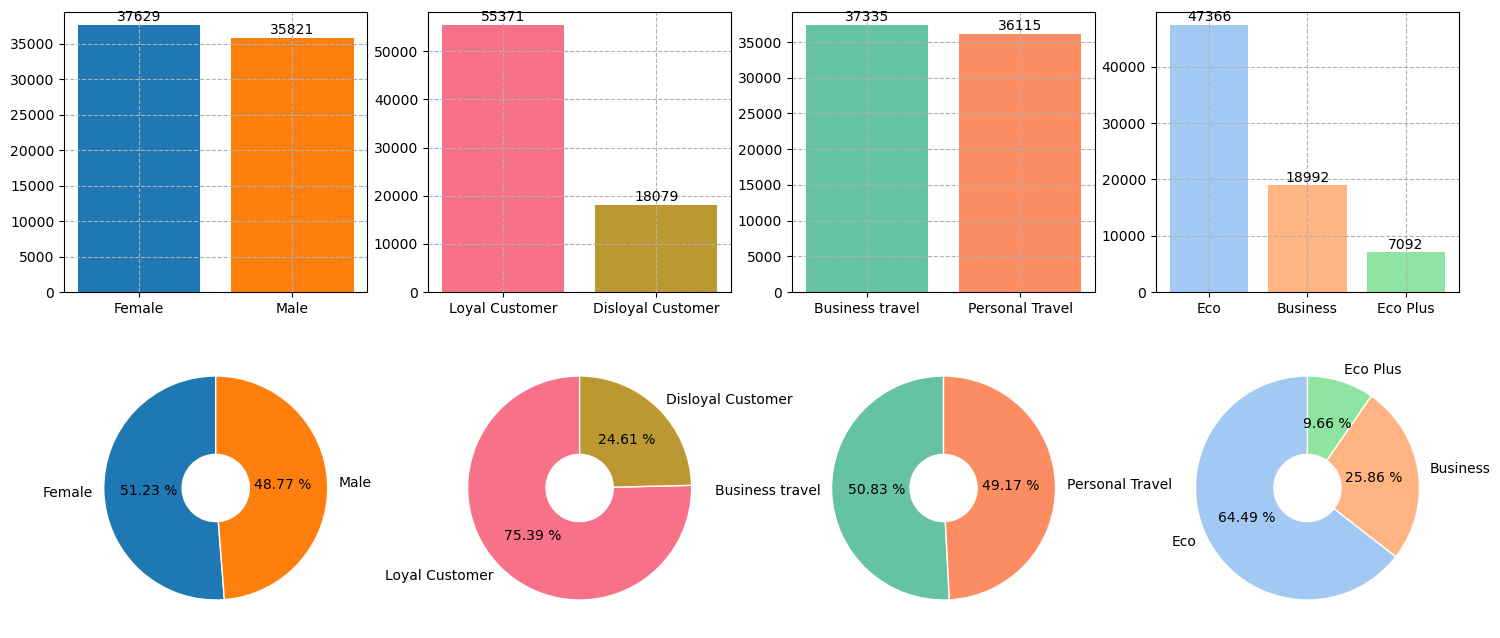

In [16]:
# Thống kê số liệu nhóm hành khách không hài lòng với dịch vụ của hãng
gender_no = df_passenger_no['Gender'].value_counts()
customertype_no = df_passenger_no['Customer Type'].value_counts()
typeoftravel_no = df_passenger_no['Type of Travel'].value_counts()
classticket_no = df_passenger_no['Class'].value_counts()

#Trực quan hóa dữ liệu:
plt.figure(figsize=(18,8))

#Trực quan hóa số liệu giới tính:
plot_bar(2,4,1,gender_no.index,gender_no.values,color1)
plot_pie(2,4,5,gender_no.index,gender_no.values,color1)

#Trực quan hóa số liệu phân loại khách:
plot_bar(2,4,2,customertype_no.index,customertype_no.values,color2)
plot_pie(2,4,6,customertype_no.index,customertype_no.values,color2)

#Trực quan hóa số liệu mục đích chuyến bay:
plot_bar(2,4,3,typeoftravel_no.index,typeoftravel_no.values,color3)
plot_pie(2,4,7,typeoftravel_no.index,typeoftravel_no.values,color3)

#Trực quan hóa số liệu hạng vé hành khách:
plot_bar(2,4,4,classticket_no.index,classticket_no.values,color4)
plot_pie(2,4,8,classticket_no.index,classticket_no.values,color4)

plt.show()

**NHẬN XÉT:**

1. Có 73450/129875 hành khách đánh giá không hài lòng với các dịch vụ của hãng bay.(chiếm 56.55%)
2. Tỷ lệ khách không hàng hài lòng với dịch vụ có sự cân bằng tương đối về giới tính (51% Nam - 49% Nữ)
3. 75% hành khách không hài lòng với dịch vụ thuộc nhóm khách hàng thân thiết (Loyal Customer) - 25% thuộc nhóm khách hàng sử dụng lần đầu.
4. Nhóm không hài lòng có sự cân bằng về mục đích ~50% hành khách đi máy bay với mục đích công việc, ~50% đi với mục đích cá nhân.
5. Nhóm hành khách không hài lòng chủ yếu mua vé hạng phổ thông (Eco) chiếm ~65%, tiếp đến là hạng thương gia (Business) chiếm 26%


## 4.2 Phân tích số liệu cho từng dịch vụ
---
### 1. Dịch vụ wifi trên máy bay: Inflight wifi service

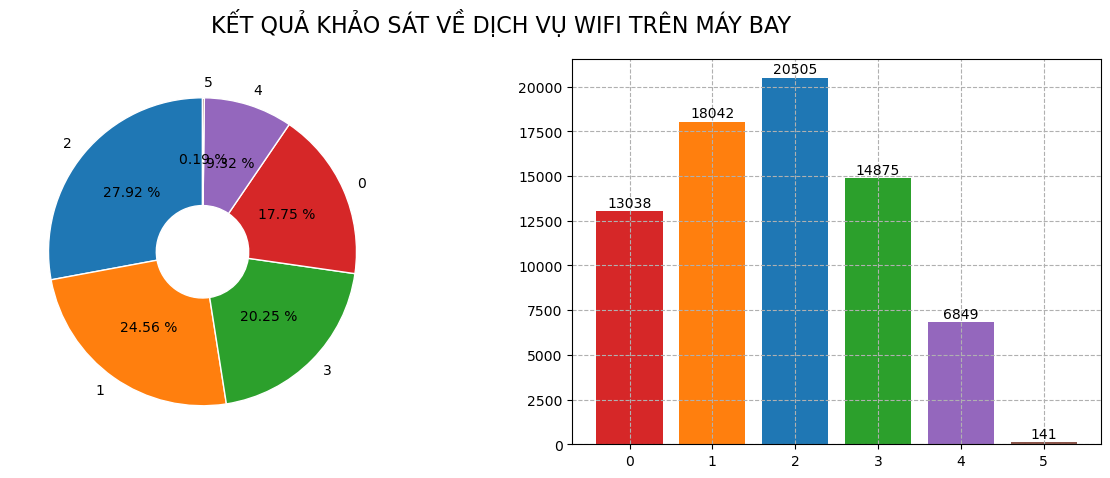

In [17]:
#Thống kê số liệu đánh giá dịch vụ Wifi
wifiservice = df_passenger_no['Inflight wifi service'].value_counts()

#Trực quan hóa dữ liệu 
plt.figure(figsize=(15,5))

plot_pie(1,2,1,wifiservice.index,wifiservice.values,color1)
plot_bar(1,2,2,wifiservice.index,wifiservice.values,color1)

plt.suptitle('KẾT QUẢ KHẢO SÁT VỀ DỊCH VỤ WIFI TRÊN MÁY BAY',fontsize=16)
plt.show()

In [18]:
#Điểm trung bình hành khách chấm cho dịch vụ:
round(df_passenger_no['Inflight wifi service'].mean(),1)

1.8

**NHẬN XÉT:**
---
* Dịch vụ Wifi ảnh hưởng lớn tới mức độ hài lòng của Hành khách, Nhóm hành khách không hài lòng đều đánh giá điểm dịch vụ này thấp (<=3 điểm);

* Điểm trung bình hành khách đánh giá cho dịch vụ này 1.8 điểm

### 2. Mức độ thoải mái ở ga khởi hành và ga đến: Departure/Arrival time convenient

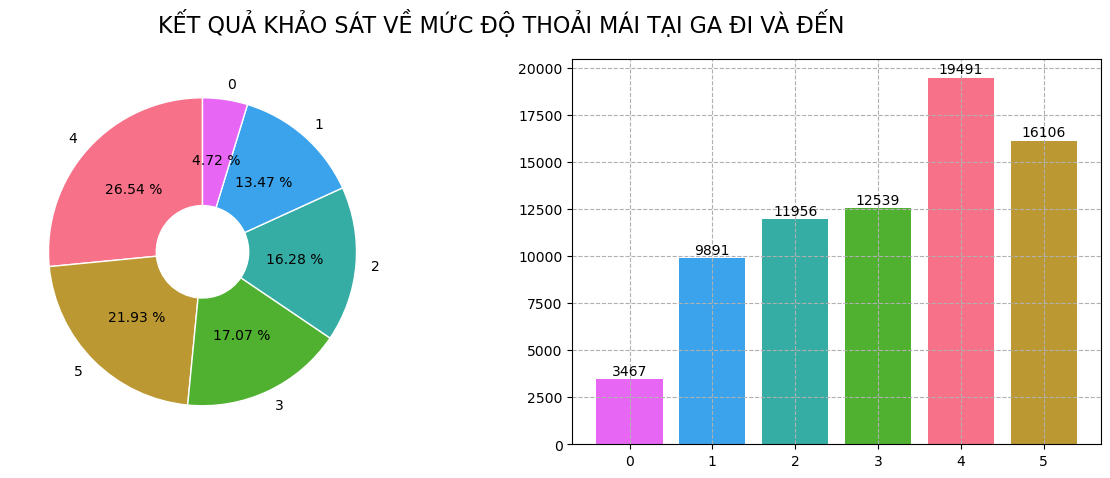

In [19]:
#Thống kê số liệu đánh giá:
convenient = df_passenger_no['Departure/Arrival time convenient'].value_counts()

#Trực quan hóa dữ liệu 
plt.figure(figsize=(15,5))
plot_pie(1,2,1,convenient.index,convenient.values,color2)
plot_bar(1,2,2,convenient.index,convenient.values,color2)

plt.suptitle('KẾT QUẢ KHẢO SÁT VỀ MỨC ĐỘ THOẢI MÁI TẠI GA ĐI VÀ ĐẾN',fontsize=16)
plt.show()

In [20]:
#Điểm trung bình hành khách chấm cho dịch vụ:
round(df_passenger_no['Departure/Arrival time convenient'].mean(),1)

3.1

**NHẬN XÉT:**
---
* Mức độ thoải mái tại ga đi và đến được đánh giá cao (>=3 điểm), nhưng kết luận cuối cùng Hành khách vẫn đánh giá là 'KHÔNG HÀI LÒNG' ==> Yếu tố này ít ảnh hưởng tới hài lòng của hành khách.

* Điểm trung bình hành khách đánh giá cho dịch vụ này 3.1 điểm

### 3. Dịch vụ đặt vé Online: Ease of Online booking

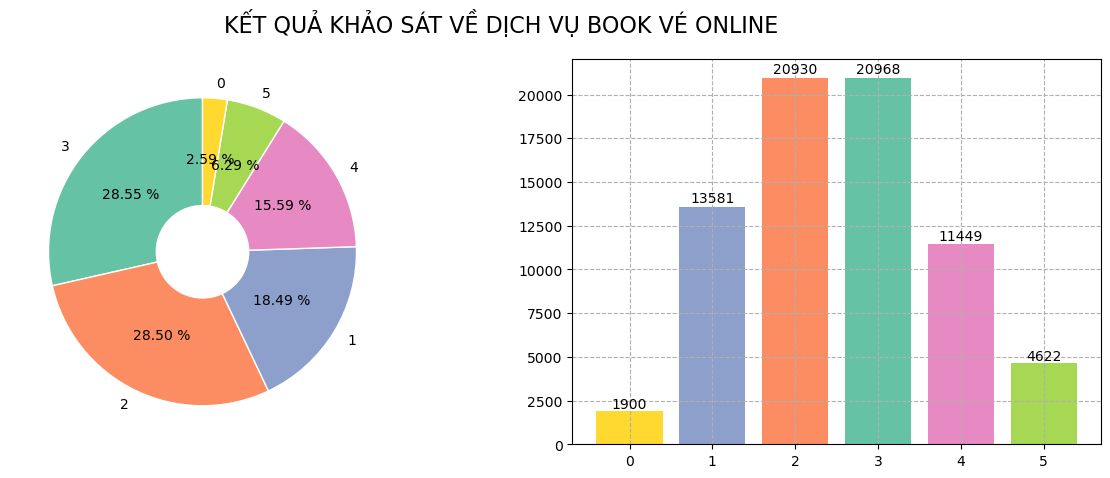

In [21]:
#Thống kê số liệu:
booking = df_passenger_no['Ease of Online booking'].value_counts()

#Trực quan hóa dữ liệu 
plt.figure(figsize=(15,5))

plot_pie(1,2,1,booking.index,booking.values,color3)
plot_bar(1,2,2,booking.index,booking.values,color3)

plt.suptitle('KẾT QUẢ KHẢO SÁT VỀ DỊCH VỤ BOOK VÉ ONLINE',fontsize=16)
plt.show()

In [22]:
#Điểm trung bình hành khách chấm cho dịch vụ:
round(df_passenger_no['Ease of Online booking'].mean(),1)

2.5

**NHẬN XÉT:**
---
* Yếu tố đặt vé Online có dễ dàng hay không cũng ảnh hưởng tới cảm nhận của Hành khách, nhưng mức độ ảnh hưởng không cao. Điểm đánh giá cho yếu tố này ở mức trung bình chủ yếu là 2, 3 điểm

* Điểm trung bình hành khách đánh giá cho dịch vụ này 2.5 điểm

### 4.Dịch vụ Ăn uống trên máy bay: Food and drink

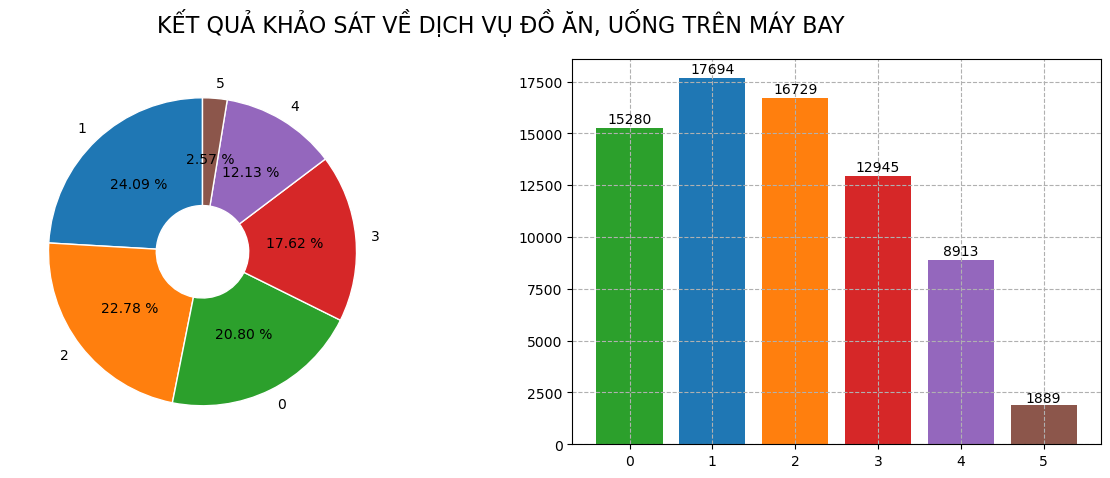

In [23]:
#Thống kê số liệu:
food_drink = df_passenger_no['Food and drink'].value_counts()

#Trực quan hóa dữ liệu 
plt.figure(figsize=(15,5))

plot_pie(1,2,1,food_drink.index,food_drink.values,color1)
plot_bar(1,2,2,food_drink.index,food_drink.values,color1)

plt.suptitle('KẾT QUẢ KHẢO SÁT VỀ DỊCH VỤ ĐỒ ĂN, UỐNG TRÊN MÁY BAY',fontsize=16)
plt.show()

In [24]:
#Điểm trung bình hành khách chấm cho dịch vụ:
round(df_passenger_no['Food and drink'].mean(),1)

1.8

**NHẬN XÉT:**
---
* Dịch vụ ăn uống trên chuyến bay là một trong những yếu tố ảnh hưởng lớn tới mức độ hài lòng của Hành khách, Đa số Nhóm hành khách không hài lòng đều đánh giá điểm dịch vụ này thấp (<=3 điểm);

* Điểm trung bình hành khách đánh giá cho dịch vụ này 1.8 điểm

### 5.Thoải mái của chỗ ngồi trên máy bay: Seat comfort

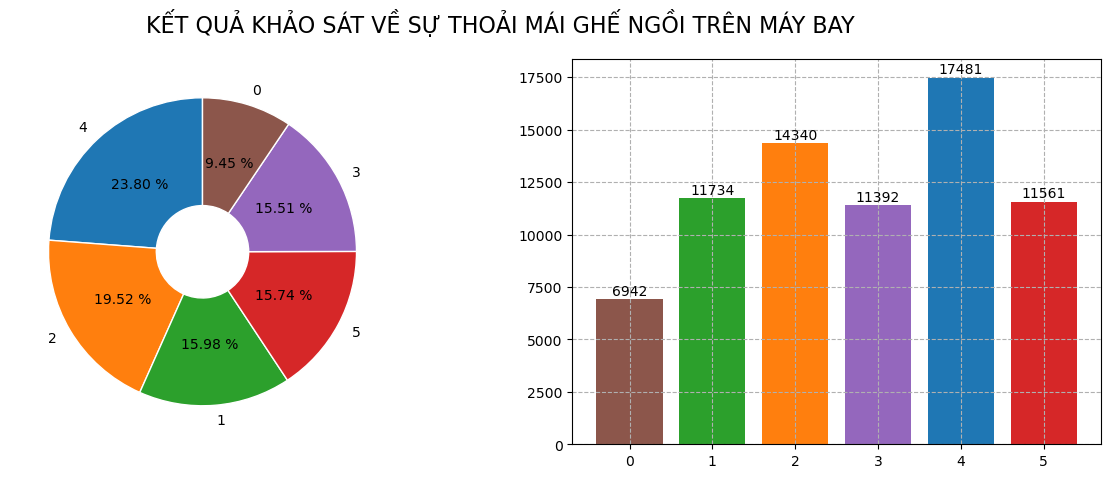

In [25]:
# Thống kê số liệu
seat_comfort = df_passenger_no['Seat comfort'].value_counts()

#Trực quan hóa dữ liệu 
plt.figure(figsize=(15,5))
plot_pie(1,2,1,seat_comfort.index,seat_comfort.values,color1)
plot_bar(1,2,2,seat_comfort.index,seat_comfort.values,color1)

plt.suptitle('KẾT QUẢ KHẢO SÁT VỀ SỰ THOẢI MÁI GHẾ NGỒI TRÊN MÁY BAY',fontsize=16)
plt.show()

In [26]:
#Điểm trung bình hành khách chấm cho dịch vụ:
round(df_passenger_no['Seat comfort'].mean(),1)

2.8

**NHẬN XÉT:**
---
* Điểm đánh giá mức độ thoải mái của chỗ ngồi trên chuyến bay trải khá đều trong khoảng 0-5, cho thấy mức độ ảnh hưởng của yếu này tới đánh giá chung của Hành khách không nhiều;

* Điểm trung bình hành khách đánh giá cho dịch vụ này 2.8 điểm

### 6.Giải trí trên máy bay: Inflight entertainment

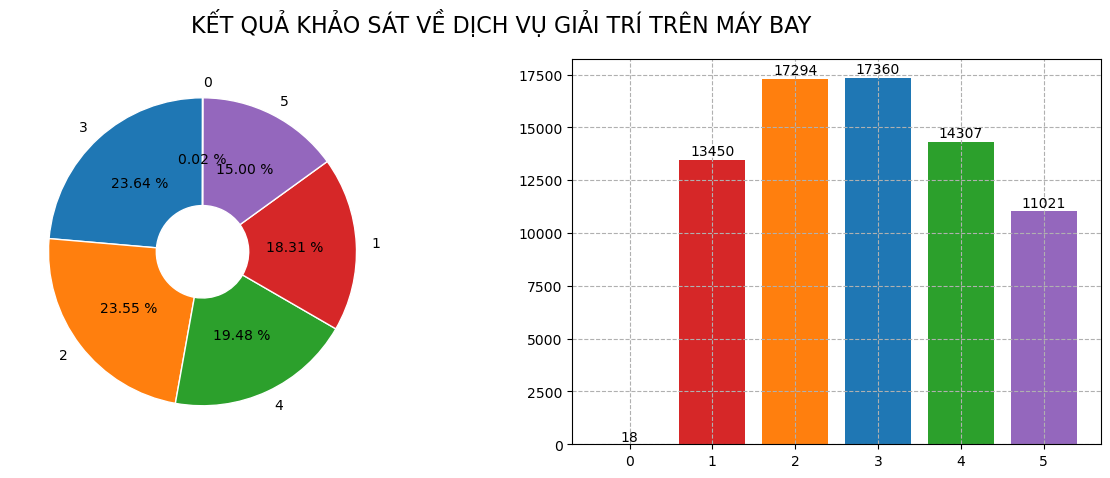

In [27]:
# Thống kê số liệu đánh giá
Inflight_entertainment = df_passenger_no['Inflight entertainment'].value_counts()

#Trực quan hóa dữ liệu 
plt.figure(figsize=(15,5))

plot_pie(1,2,1,Inflight_entertainment.index,Inflight_entertainment.values,color1)
plot_bar(1,2,2,Inflight_entertainment.index,Inflight_entertainment.values,color1)

plt.suptitle('KẾT QUẢ KHẢO SÁT VỀ DỊCH VỤ GIẢI TRÍ TRÊN MÁY BAY',fontsize=16)
plt.show()

In [28]:
#Điểm trung bình hành khách chấm cho dịch vụ:
round(df_passenger_no['Inflight entertainment'].mean(),1)

2.9

**NHẬN XÉT:**
---
* Dịch vụ giải trí trên chuyến bay ít ảnh hưởng tới hài lòng của hành khách.

* Điểm trung bình hành khách đánh giá cho dịch vụ này 2.9 điểm

### 7. Vấn đề về hành lý: Baggage handling


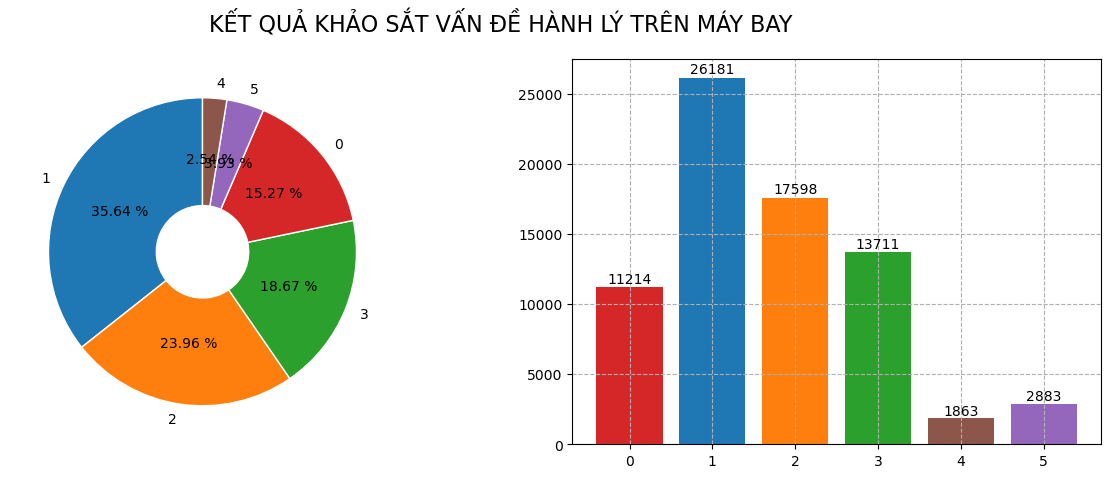

In [29]:
#Thông kê số liệu
baggage_handling = df_passenger_no['Baggage handling'].value_counts()

#Trực quan hóa dữ liệu 
plt.figure(figsize=(15,5))

plot_pie(1,2,1,baggage_handling.index,baggage_handling.values,color1)
plot_bar(1,2,2,baggage_handling.index,baggage_handling.values,color1)

plt.suptitle('KẾT QUẢ KHẢO SẮT VẤN ĐỀ HÀNH LÝ TRÊN MÁY BAY',fontsize=16)
plt.show()

In [30]:
#Điểm trung bình hành khách chấm cho dịch vụ:
round(df_passenger_no['Baggage handling'].mean(),1)

1.7

**NHẬN XÉT:**
---
* Các Vấn đề liên quan đến hành lý ảnh hưởng lớn tới mức độ hài lòng của Hành khách, Nhóm hành khách không hài lòng đều đánh giá điểm dịch vụ này thấp (<=3 điểm);  1 điểm rất nhiều.

* Điểm trung bình hành khách đánh giá cho dịch vụ này 1.7 điểm

### 8. Dịch vụ checkin: Checkin service

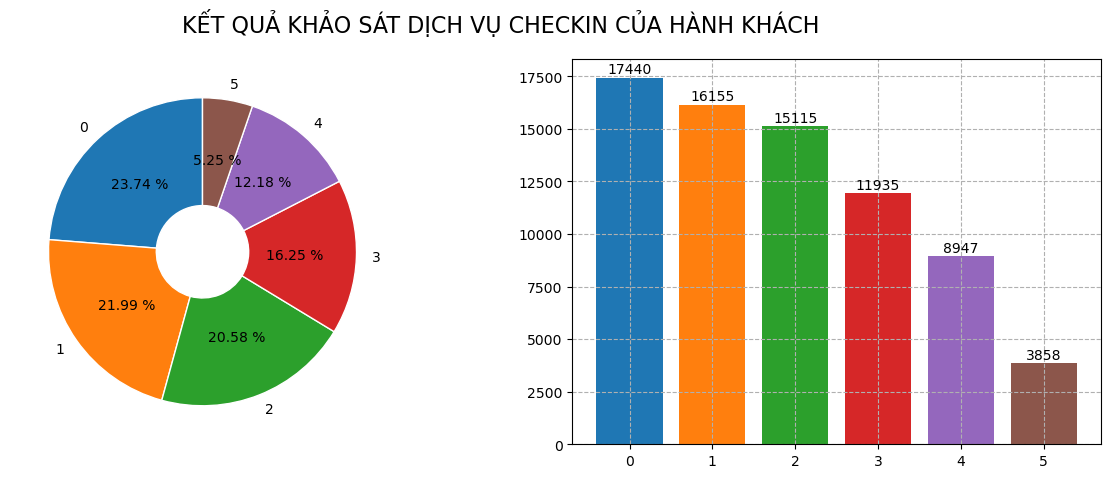

In [31]:
# Thống kê số liệu
checkin_service = df_passenger_no['Checkin service'].value_counts()

#Trực quan hóa dữ liệu 
plt.figure(figsize=(15,5))

plot_pie(1,2,1,checkin_service.index,checkin_service.values,color1)
plot_bar(1,2,2,checkin_service.index,checkin_service.values,color1)

plt.suptitle('KẾT QUẢ KHẢO SÁT DỊCH VỤ CHECKIN CỦA HÀNH KHÁCH',fontsize=16)
plt.show()

In [32]:
#Điểm trung bình hành khách chấm cho dịch vụ:
round(df_passenger_no['Checkin service'].mean(),1)

1.9

**NHẬN XÉT:**
---
* Dịch vụ checkin cũng ảnh hưởng lớn tới mức độ hài lòng của Hành khách, Nhóm hành khách không hài lòng đều đánh giá điểm dịch vụ này thấp (<=3 điểm);  chủ yếu là các điểm 0, 1 điểm rất nhiều.

* Điểm trung bình hành khách đánh giá cho dịch vụ này 1.9 điểm

### 9.Vấn đề về các dịch vụ trên chuyến bay: Inflight service

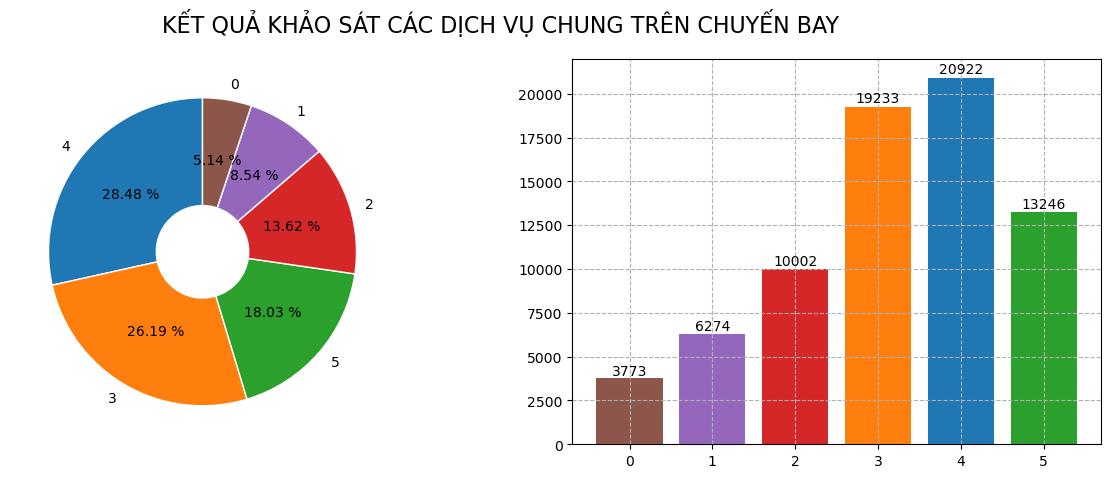

In [33]:
# Thống kê số liệu
inflight_service = df_passenger_no['Inflight service'].value_counts()

#Trực quan hóa dữ liệu 
plt.figure(figsize=(15,5))

plot_pie(1,2,1,inflight_service.index,inflight_service.values,color1)
plot_bar(1,2,2,inflight_service.index,inflight_service.values,color1)

plt.suptitle('KẾT QUẢ KHẢO SÁT CÁC DỊCH VỤ CHUNG TRÊN CHUYẾN BAY',fontsize=16)
plt.show()

In [34]:
#Điểm trung bình hành khách chấm cho dịch vụ:
round(df_passenger_no['Inflight service'].mean(),1)

3.2

**NHẬN XÉT:**
---
* Dịch vụ chung trên chuyến bay ít ảnh hưởng tới hài lòng của hành khách.

* Điểm trung bình hành khách đánh giá cho dịch vụ này 3.2 điểm

### 10.Vấn đề về vệ sinh trên chuyến bay: Cleanliness

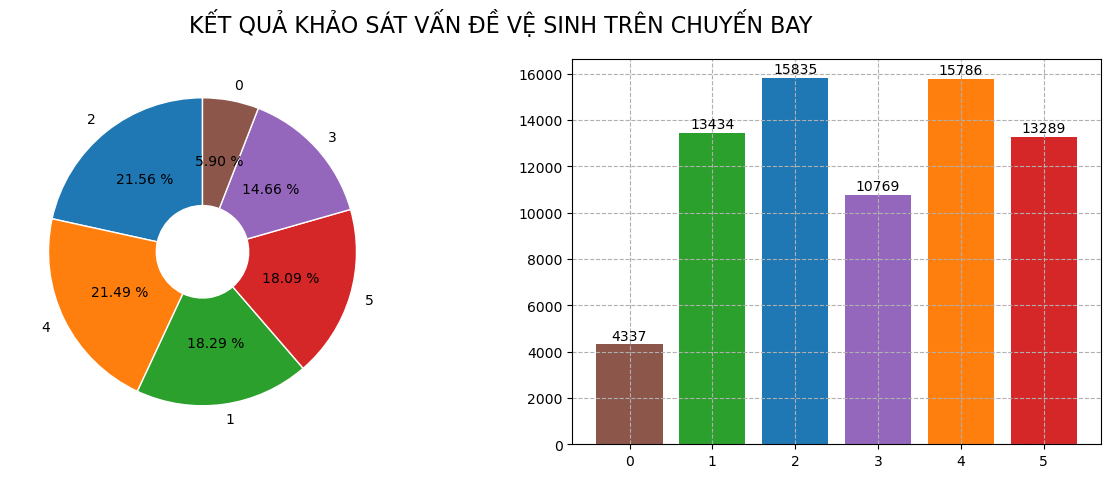

In [35]:
# Thống kê số liệu
cleanliness = df_passenger_no['Cleanliness'].value_counts()

#Trực quan hóa dữ liệu 
plt.figure(figsize=(15,5))

plot_pie(1,2,1,cleanliness.index,cleanliness.values,color1)
plot_bar(1,2,2,cleanliness.index,cleanliness.values,color1)

plt.suptitle('KẾT QUẢ KHẢO SÁT VẤN ĐỀ VỆ SINH TRÊN CHUYẾN BAY',fontsize=16)
plt.show()

In [36]:
#Điểm trung bình hành khách chấm cho dịch vụ:
round(df_passenger_no['Cleanliness'].mean(),1)

2.8

**NHẬN XÉT:**
---
* Dịch vụ vệ sinh trên chuyến bay cũng ảnh hưởng tới hài lòng của hành khách nhưng mức độ trung bình.

* Điểm trung bình hành khách đánh giá cho dịch vụ này 2.8 điểm

In [37]:
#Check đặc trưng thống kê với các thuộc tính khảo sát:
df_passenger_no.iloc[:,9:19].mean()

Inflight wifi service                1.794118
Departure/Arrival time convenient    3.130211
Ease of Online booking               2.549367
Food and drink                       1.839129
Seat comfort                         2.754513
Inflight entertainment               2.892457
Baggage handling                     1.693356
Checkin service                      1.868863
Inflight service                     3.184411
Cleanliness                          2.818244
dtype: float64

**TỔNG HỢP KẾT QUẢ:**
---
* 10 dịch vụ khảo sát đều ảnh hưởng tới mức độ Không hài lòng của Hành khách. Tuy nhiên, mỗi yếu tố ảnh hưởng nhiều ít khác nhau trong đó:
    1. Baggage handling (1.69)
    2. Inflight wifi service (1.79)
    3. Food and drink (1.83)
    4. Checkin service (1.87)
    5. Ease of Online booking (2.55)
    6. Seat comfort (2.75)
    7. Cleanliness (2.81)
    8. Inflight entertainment (2.89)
    9. Departure/Arrival time convenient (3.13)
    10. Inflight service (3.18)
    

## [NOTE] Vấn đề trễ chuyến bay (Delay) với sự hài lòng của hành khách!
---

In [38]:
#Thống kê thông tin trễ chuyến bay: - Toàn bộ tập dữ liệu:
df_passenger[['Departure Delay in Minutes','Arrival Delay in Minutes']].describe()

,Departure Delay in Minutes,Arrival Delay in Minutes
count,129875.000000,129485.000000
mean,14.713917,15.091292
std,38.071778,38.465921
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,12.000000,13.000000
max,1592.000000,1584.000000


In [39]:
#Thống kê với tập Hành khách không hài lòng:
df_passenger_no[['Departure Delay in Minutes', 'Arrival Delay in Minutes']].describe()

,Departure Delay in Minutes,Arrival Delay in Minutes
count,73450.000000,73224.000000
mean,16.407134,17.056225
std,40.183411,40.522249
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,15.000000,16.250000
max,1592.000000,1584.000000


In [40]:
#Lọc trong dữ liệu các hành khách có chuyến bay khởi hành trễ từ (3h) 180 phút trở lên:
df_delay = df_passenger[(df_passenger['Departure Delay in Minutes']>=180)]
print('Tổng số hành khách đi các chuyến bay delay >=180 phút:',df_delay.shape[0])
df_delay


Tổng số hành khách đi các chuyến bay delay >=180 phút: 1312


,Code,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Food and drink,Seat comfort,Inflight entertainment,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
277,IN83505194,Male,Loyal Customer,40,Business travel,Business,1959,209.0,191.0,3,3,3,4,4,4,5,4,5,4,satisfied
403,SB08347986,Male,Disloyal Customer,25,Business travel,Eco,1258,199.0,185.0,0,3,3,0,2,1,1,2,1,2,neutral or dissatisfied
581,HO18997892,Female,Loyal Customer,16,Business travel,Business,2899,220.0,212.0,5,5,5,4,4,3,5,4,3,4,satisfied
602,ZG42133092,Male,Disloyal Customer,37,Business travel,Eco,107,232.0,241.0,0,2,2,2,4,3,0,0,2,4,neutral or dissatisfied
664,NX62759967,Female,Loyal Customer,16,Personal Travel,Business,1325,243.0,226.0,5,4,5,5,4,5,5,4,4,4,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129358,KO95331706,Male,Loyal Customer,12,Personal Travel,Eco,990,243.0,244.0,1,4,1,1,3,3,5,3,5,3,neutral or dissatisfied
129390,HN45446278,Female,Loyal Customer,57,Personal Travel,Eco,1823,181.0,179.0,3,4,3,3,5,3,5,5,5,5,neutral or dissatisfied
129399,VH05691625,Female,Loyal Customer,13,Personal Travel,Eco,986,214.0,210.0,3,2,3,3,4,2,4,4,3,4,neutral or dissatisfied
129473,CA80357979,Male,Loyal Customer,63,Personal Travel,Eco,569,332.0,311.0,4,5,4,4,4,3,5,4,3,4,satisfied


In [41]:
#Danh sách những hành khách bị trễ bay >=180 phút những vẫn đánh giá hài lòng:
df_delay_ok = df_passenger[(df_passenger['Departure Delay in Minutes']>=180) & (df_passenger['satisfaction']=='satisfied')]
print('Số hành khách có chuyến bay bị delay>=180 phút nhưng vẫn hài lòng:',df_delay_ok.shape[0],'/',df_delay.shape[0])
df_delay_ok

Số hành khách có chuyến bay bị delay>=180 phút nhưng vẫn hài lòng: 474 / 1312


,Code,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Food and drink,Seat comfort,Inflight entertainment,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
277,IN83505194,Male,Loyal Customer,40,Business travel,Business,1959,209.0,191.0,3,3,3,4,4,4,5,4,5,4,satisfied
581,HO18997892,Female,Loyal Customer,16,Business travel,Business,2899,220.0,212.0,5,5,5,4,4,3,5,4,3,4,satisfied
664,NX62759967,Female,Loyal Customer,16,Personal Travel,Business,1325,243.0,226.0,5,4,5,5,4,5,5,4,4,4,satisfied
1202,PW98796704,Male,Loyal Customer,33,Business travel,Eco,483,313.0,336.0,4,4,4,4,4,4,3,4,5,4,satisfied
1222,GI29355015,Female,Loyal Customer,33,Business travel,Business,1262,232.0,219.0,3,3,2,4,4,5,5,4,3,4,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127306,BI73404806,Male,Loyal Customer,53,Business travel,Business,473,248.0,252.0,2,2,2,5,5,3,5,5,3,5,satisfied
127939,YF35682477,Female,Loyal Customer,43,Business travel,Business,476,262.0,279.0,1,1,4,5,5,2,5,5,5,5,satisfied
128493,XF09945161,Male,Loyal Customer,57,Business travel,Business,2505,344.0,319.0,4,4,4,2,2,4,5,2,5,2,satisfied
128779,AU08303494,Male,Loyal Customer,49,Business travel,Eco,199,283.0,305.0,4,5,5,4,4,5,3,4,5,4,satisfied


In [42]:
#Xác định các đặc trưng
df_delay_ok.iloc[:,[7,9,10,11,12,13,14,15,16,18]].describe()

,Departure Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Food and drink,Seat comfort,Inflight entertainment,Baggage handling,Checkin service,Cleanliness
count,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000
mean,266.991561,3.172996,2.909283,2.974684,4.071730,3.945148,3.607595,4.014768,3.945148,3.945148
std,112.119971,1.552339,1.536793,1.530311,1.058102,1.084753,1.187508,1.106292,1.084753,1.084753
min,180.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,197.000000,2.000000,2.000000,2.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000
50%,231.500000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
75%,301.500000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,1305.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [44]:
#Điểm trung bình cho mỗi dịch vụ khảo sát
df_delay_ok.iloc[:,9:19].mean()

Inflight wifi service                3.172996
Departure/Arrival time convenient    2.909283
Ease of Online booking               2.974684
Food and drink                       4.071730
Seat comfort                         3.945148
Inflight entertainment               3.607595
Baggage handling                     4.014768
Checkin service                      3.945148
Inflight service                     3.654008
Cleanliness                          3.945148
dtype: float64

**Từ phân tích số liệu ở trên thấy rằng, trong trường hợp chuyến bay bị Delay lâu để hành khách vẫn có thể happy với hãng hãy tập trung vào các dịch vụ:**
* Food and drink - 4.07
* Baggage handling - 4.01
* Seat comfort,Checkin service, Cleanliness - 3.95


<img src='Pic/action.jpg' width='600px'>